# Generate Recordings Descriptions
This service will use ChatGPT to read the recordings transcriptions and will generate meaningful description for every recording

This notebook will also query ChatGPT to provide classification of the recordings according [to the schema](../../references/ChatGPT_Prompts.md)

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
import os
import pandas as pd
import json

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from lib_henryk.config import *
from lib_henryk.logger import *
from lib_henryk import utils
from lib_henryk.recordings import transcriptions
from lib_henryk.recordings import classification
from lib_henryk.recordings import recordings
from lib_henryk.visualization import visualize

warnings.filterwarnings('ignore')

## Params

In [3]:
# configurable regex to help select only columns that matter
REGEX_COLUMNS_NAME_DATE_CLASSIFICATION="^(name|date|classification\..*)$"


## Load Resources and Generate Stats
- classifications

In [4]:
# load classifications
df_transcriptions_classifications = pd.read_parquet(FILE_TRANSCRIPTIONS_CLASSIFICATION_PARQUET)
df_stats = classification.Transcription_Classifier.process_dataframe_json(df_transcriptions_classifications, json_column='classification_json')
df_stats = recordings.sort_df_by_date_inferred_from_name(df_stats, drop_date=False)

## Data Conditioning
- claning, conversions, augmentation, transformations

In [5]:
df_stats = df_stats.filter(regex=REGEX_COLUMNS_NAME_DATE_CLASSIFICATION)

## Perform Analysis

### Analyse sentiments across the recordings

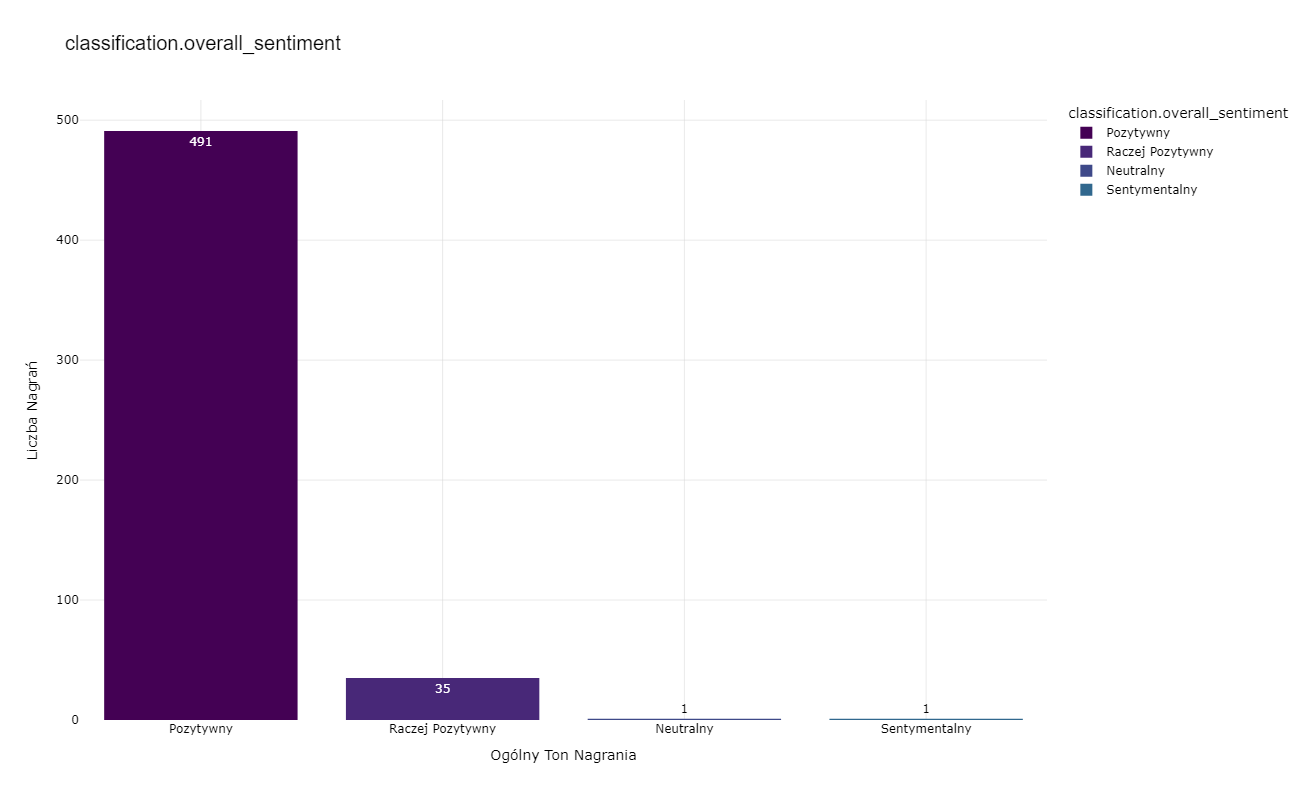

In [17]:
visualize.plot_categorical_histogram(df_stats, 'classification.overall_sentiment', mapping_file='../../resources/text_mappings.json')